<a href="https://colab.research.google.com/github/abhishekmarkad/Campusx/blob/main/Case_Study_%5BCLT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Readme

# Readme
 * Work around Central Limit Theorem to inference avg salary for docters.
 * dataset - https://www.kaggle.com/datasets/pythonafroz/doctors

## central limit theorem

* central limit formula says that the random variable of the sample means will be normally distributed with a mean that will be equal to the original distribution and standard deviation given by σ / √n.


In [1]:
#import required modules
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
data=pd.read_csv(r'/content/Doctors job dataset.csv')

In [3]:
data

,S.No,Resume Title,Work Exp,Annual Salary,Current Location,Preferred Location,Designation,U.G. Course,P. G. Course,Post P. G. Course,Age/Date of Birth,Resume ID,Last Active Date
0,1,Experienced Dermatologist with 5 years plus ex...,5.8,10.0,Kolkata,Kolkata,NaN,Mbbs,Md Dermatology,Dr,40.0,0c264007658bd1c224,2016
1,2,"M.B.B.S.,D.D.V.(Skin) with 5 yrs experience.",5.0,10.5,Dubai,Dubai,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,NaN,40.0,3697d8852652123c53,2014
2,3,"MBBS, D.V.D & DNB (Dermatology) with 7 yrs exp...",8.2,30.0,Dubai,All India,Dermatologist,Mbbs,Dnb,NaN,48.0,4b98d6db4fc0b5b012,2009
3,4,"MBBS; DNB, FCPS,DDV with 6yrs of Exp.",7.0,9.6,Mumbai,Mumbai,NaN,Mbbs,Dnb Dermatology,D.d.v,41.0,59063066742215cd70,2013
4,5,Medical and cosmetic dermatology and dermatosu...,10.0,15.0,New Delhi,Delhi / Ncr,Consultant Dermatologist And Cosmetologist,Mbbs,Pg Diploma,NaN,40.0,1aea93342d8c652a71,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,399,dermatologist cosmetologist Hair Transplant su...,10.0,27.0,New Delhi,"Uae,india,qatar",Consultant Dermatologist,Mbbs,Dnb Dermatology,NaN,NaN,48a7aee24aff97e770,2021
395,400,Dermatologist Specialist with more than 5 year...,6.0,18.0,Nellore,"Qatar,dubai",Specialist Dermatologist Cosmetologist,Mbbs,Medical-ms/md,NaN,37.0,fbe7d9e52fa3478687b22b6f8cc741cf,2021
396,401,Senior Consultant Dermatologist in Kaya Skin C...,12.0,6.0,Hyderabad,Hyderabad,"Senior Dermatologist,trichologist And Cosmetol...",Mbbs,Medical-ms/md,NaN,44.0,a6699f56eaa14eca9732574fc1f98cc1,2021
397,402,"Dermatologist and cosmetologist, MD Dermatolog...",6.7,30.0,New Delhi,Delhi / Ncr,Consultant Dermatologist,Mbbs,Md Dermatology,NaN,31.0,298364e929a641a4b49eafc8a6118cc9,2021


In [4]:
# we will be playing around salary only
data['Annual Salary'].describe()

count    399.000000
mean      15.104787
std       14.518807
min        0.000000
25%        6.000000
50%       12.000000
75%       20.000000
max      101.000000
Name: Annual Salary, dtype: float64

<Axes: xlabel='Annual Salary', ylabel='Density'>

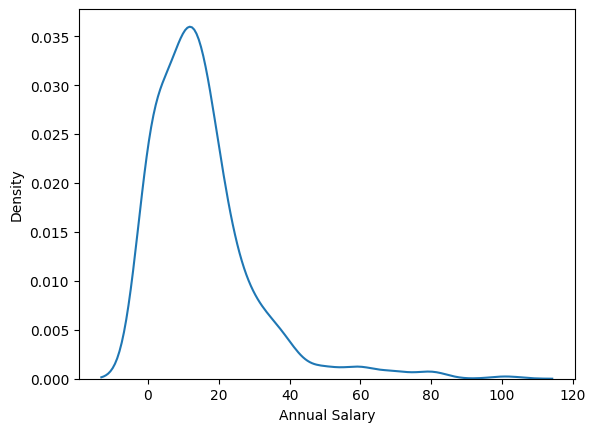

In [5]:
# let see what is original distribution for Annual Salary
sns.kdeplot(data['Annual Salary'])

In [ ]:
# clearly it is positively skewed data.
# we will apply clt and try to inference mean

In [6]:
# take 10 sample of size 25 from data
sample_means=[]
for i in range(10):
  sample=data['Annual Salary'].sample(25)
  sample_means.append(sample.mean())

<ipython-input-7-83001f627cde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means,bins=5,kde=True)


<Axes: ylabel='Density'>

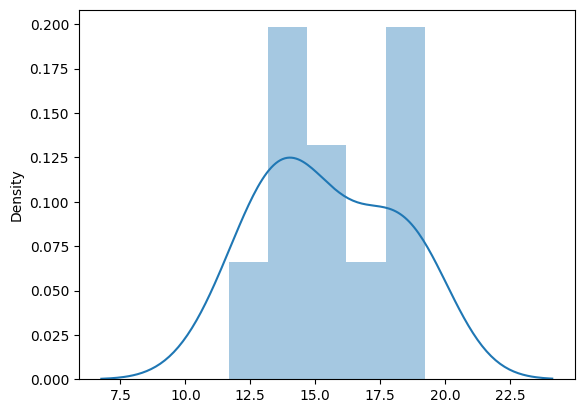

In [7]:
sns.distplot(sample_means,bins=5,kde=True)

In [8]:
# average salary from samples
np.mean(sample_means)

15.46584

In [9]:
# std from samples
np.std(sample_means)/np.sqrt(25)

0.4912237286776769

In [10]:
np.mean(data['Annual Salary'])

15.104786967418544

###Sample stastics are looking away from population
 ##### sample size - 25 , samples = 10 ☝
 * population mean - 15.104
 * population std -14.500
 * sample mean -
 * sample std -


In [11]:
# lets try clt with sample size >=30
sample_means_with_size_30=[]
for i in range(10):
  sample=data['Annual Salary'].sample(30)
  sample_means_with_size_30.append(sample.mean())


<ipython-input-12-56099a29d9e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means_with_size_30,bins=5,kde=True)


<Axes: ylabel='Density'>

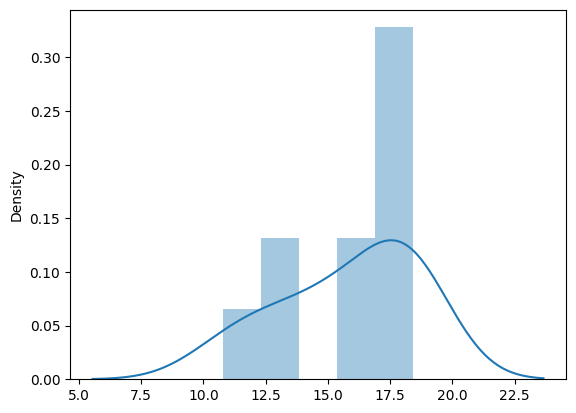

In [12]:
sns.distplot(sample_means_with_size_30,bins=5,kde=True)

In [13]:
np.mean(sample_means_with_size_30)


15.815533333333338

In [14]:
np.std(sample_means_with_size_30)/np.sqrt(30)

0.47975883231597255

In [15]:
np.std(data['Annual Salary'])

14.50060141842298

###Sample stastics are looking close to population
 ##### sample size - 25 , samples = 10 ☝
 * population mean - 15.104
 * population std -14.500
 * sample mean - 15.83
 * sample std - 13.13

In [ ]:
# results are looking close to population

In [ ]:
#will try with more samples
